In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#Data preprocessing for half Second Window

In [217]:
df = pd.read_csv('dataset_balanced_w_10_dx_3.csv')
df

,time,activityrecognition#0,activityrecognition#1,android.sensor.light#mean,android.sensor.light#min,android.sensor.light#max,android.sensor.light#std,android.sensor.light#entropy,android.sensor.light#complexity,android.sensor.accelerometer#mean,...,android.sensor.proximity#entropy,android.sensor.proximity#complexity,android.sensor.pressure#mean,android.sensor.pressure#min,android.sensor.pressure#max,android.sensor.pressure#std,android.sensor.pressure#entropy,android.sensor.pressure#complexity,target,user
0,1,NaN,NaN,7.0,7.0,7.0,NaN,0.0,0.0,9.673811,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,Bus,U1
1,2,NaN,NaN,7.0,7.0,7.0,NaN,0.0,0.0,9.641004,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,Bus,U1
2,3,NaN,NaN,7.0,7.0,7.0,NaN,0.0,0.0,9.683349,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,Bus,U1
3,4,NaN,NaN,7.0,7.0,7.0,NaN,0.0,0.0,9.683914,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,Bus,U1
4,5,NaN,NaN,7.0,7.0,7.0,NaN,0.0,0.0,9.651339,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,Bus,U1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,43,NaN,NaN,58.0,15.0,101.0,60.811183,0.0,0.0,11.216822,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,Walking,U9
3246,22,NaN,NaN,58.0,15.0,101.0,60.811183,0.0,0.0,10.946838,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,Walking,U9
3247,30,NaN,NaN,58.0,15.0,101.0,60.811183,0.0,0.0,11.258049,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,Walking,U9
3248,47,NaN,NaN,58.0,15.0,101.0,60.811183,0.0,0.0,11.443158,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,Walking,U9


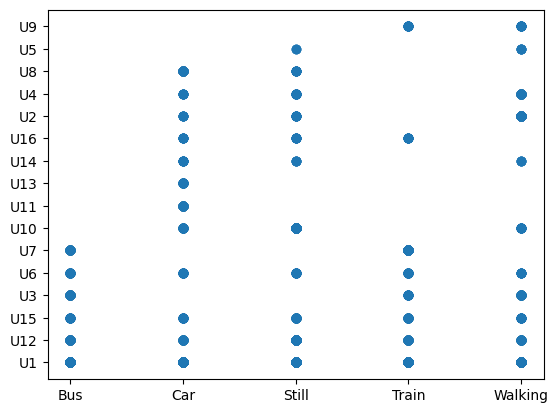

In [218]:
plt.scatter(df['target'],df['user'])

In [219]:
df['target'].value_counts()

target
Car        651
Bus        650
Still      650
Train      650
Walking    649
Name: count, dtype: int64

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250 entries, 0 to 3249
Columns: 101 entries, time to user
dtypes: float64(97), int64(1), object(3)
memory usage: 2.5+ MB


In [221]:
column_lst = list(df.columns)
mostly_null = []
partially_null = []
no_null = []

In [222]:
print(column_lst)

['time', 'activityrecognition#0', 'activityrecognition#1', 'android.sensor.light#mean', 'android.sensor.light#min', 'android.sensor.light#max', 'android.sensor.light#std', 'android.sensor.light#entropy', 'android.sensor.light#complexity', 'android.sensor.accelerometer#mean', 'android.sensor.accelerometer#min', 'android.sensor.accelerometer#max', 'android.sensor.accelerometer#std', 'android.sensor.accelerometer#entropy', 'android.sensor.accelerometer#complexity', 'android.sensor.magnetic_field_uncalibrated#mean', 'android.sensor.magnetic_field_uncalibrated#min', 'android.sensor.magnetic_field_uncalibrated#max', 'android.sensor.magnetic_field_uncalibrated#std', 'android.sensor.magnetic_field_uncalibrated#entropy', 'android.sensor.magnetic_field_uncalibrated#complexity', 'android.sensor.game_rotation_vector#mean', 'android.sensor.game_rotation_vector#min', 'android.sensor.game_rotation_vector#max', 'android.sensor.game_rotation_vector#std', 'android.sensor.game_rotation_vector#entropy', '

In [223]:
for i in column_lst:
    percentage = (df[i].isnull().sum()*100)/5893
    if percentage >= 60:
        mostly_null.append(i)
    elif df[i].isnull().sum() > 0:
        partially_null.append(i)
    elif df[i].isnull().sum() == 0:
        no_null.append(i)

    print('Feature Name:',i)
    print("Number of missing values: ",df[i].isnull().sum(),"out of 5893")
    print("Missing percentage:"+str(percentage)+"%")
    print()

Feature Name: time
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: activityrecognition#0
Number of missing values:  1434 out of 5893
Missing percentage:24.333955540471745%

Feature Name: activityrecognition#1
Number of missing values:  1434 out of 5893
Missing percentage:24.333955540471745%

Feature Name: android.sensor.light#mean
Number of missing values:  888 out of 5893
Missing percentage:15.06872560665196%

Feature Name: android.sensor.light#min
Number of missing values:  888 out of 5893
Missing percentage:15.06872560665196%

Feature Name: android.sensor.light#max
Number of missing values:  888 out of 5893
Missing percentage:15.06872560665196%

Feature Name: android.sensor.light#std
Number of missing values:  2004 out of 5893
Missing percentage:34.006448328525366%

Feature Name: android.sensor.light#entropy
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.light#complexity
Number of missing values:  0 out 

In [224]:
if len(mostly_null)+len(partially_null)+len(no_null) == len(column_lst):
    print("True")
else:
    print("False")

True


In [225]:
mostly_null

[]

In [226]:
for i in mostly_null:
    df = df.drop([i], axis = 1)

In [227]:
df = df.drop(['time'], axis = 1)

In [228]:
df

,activityrecognition#0,activityrecognition#1,android.sensor.light#mean,android.sensor.light#min,android.sensor.light#max,android.sensor.light#std,android.sensor.light#entropy,android.sensor.light#complexity,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,...,android.sensor.proximity#entropy,android.sensor.proximity#complexity,android.sensor.pressure#mean,android.sensor.pressure#min,android.sensor.pressure#max,android.sensor.pressure#std,android.sensor.pressure#entropy,android.sensor.pressure#complexity,target,user
0,NaN,NaN,7.0,7.0,7.0,NaN,0.0,0.0,9.673811,9.461881,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,Bus,U1
1,NaN,NaN,7.0,7.0,7.0,NaN,0.0,0.0,9.641004,5.644632,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,Bus,U1
2,NaN,NaN,7.0,7.0,7.0,NaN,0.0,0.0,9.683349,9.587583,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,Bus,U1
3,NaN,NaN,7.0,7.0,7.0,NaN,0.0,0.0,9.683914,9.576666,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,Bus,U1
4,NaN,NaN,7.0,7.0,7.0,NaN,0.0,0.0,9.651339,8.123766,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,Bus,U1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,NaN,NaN,58.0,15.0,101.0,60.811183,0.0,0.0,11.216822,7.165702,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,Walking,U9
3246,NaN,NaN,58.0,15.0,101.0,60.811183,0.0,0.0,10.946838,6.987842,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,Walking,U9
3247,NaN,NaN,58.0,15.0,101.0,60.811183,0.0,0.0,11.258049,5.868934,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,Walking,U9
3248,NaN,NaN,58.0,15.0,101.0,60.811183,0.0,0.0,11.443158,6.119601,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,Walking,U9


In [229]:
partially_null

['activityrecognition#0',
 'activityrecognition#1',
 'android.sensor.light#mean',
 'android.sensor.light#min',
 'android.sensor.light#max',
 'android.sensor.light#std',
 'android.sensor.magnetic_field_uncalibrated#mean',
 'android.sensor.magnetic_field_uncalibrated#min',
 'android.sensor.magnetic_field_uncalibrated#max',
 'android.sensor.magnetic_field_uncalibrated#std',
 'android.sensor.game_rotation_vector#mean',
 'android.sensor.game_rotation_vector#min',
 'android.sensor.game_rotation_vector#max',
 'android.sensor.game_rotation_vector#std',
 'android.sensor.orientation#mean',
 'android.sensor.orientation#min',
 'android.sensor.orientation#max',
 'android.sensor.orientation#std',
 'android.sensor.linear_acceleration#mean',
 'android.sensor.linear_acceleration#min',
 'android.sensor.linear_acceleration#max',
 'android.sensor.linear_acceleration#std',
 'android.sensor.rotation_vector#mean',
 'android.sensor.rotation_vector#min',
 'android.sensor.rotation_vector#max',
 'android.sensor.

In [230]:
for i in partially_null:
    print("Partially Null Feature Name:",i)
    print("Number of unique values: ",len(df[i].unique()),"and Number of missing values: ",df[i].isnull().sum())
    print()

Partially Null Feature Name: activityrecognition#0
Number of unique values:  6 and Number of missing values:  1434

Partially Null Feature Name: activityrecognition#1
Number of unique values:  12 and Number of missing values:  1434

Partially Null Feature Name: android.sensor.light#mean
Number of unique values:  507 and Number of missing values:  888

Partially Null Feature Name: android.sensor.light#min
Number of unique values:  319 and Number of missing values:  888

Partially Null Feature Name: android.sensor.light#max
Number of unique values:  345 and Number of missing values:  888

Partially Null Feature Name: android.sensor.light#std
Number of unique values:  318 and Number of missing values:  2004

Partially Null Feature Name: android.sensor.magnetic_field_uncalibrated#mean
Number of unique values:  2746 and Number of missing values:  448

Partially Null Feature Name: android.sensor.magnetic_field_uncalibrated#min
Number of unique values:  2732 and Number of missing values:  448

In [231]:
for i in partially_null:
    df[i] = df[i].fillna(0)

In [232]:
newcolumns = list(df.columns)

In [233]:
for i in newcolumns:
    
    print('Feature Name:',i)
    print("Number of missing values: ",df[i].isnull().sum(),"out of 5893")
    print("Missing percentage:"+str(percentage)+"%")
    print()

Feature Name: activityrecognition#0
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: activityrecognition#1
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.light#mean
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.light#min
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.light#max
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.light#std
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.light#entropy
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.light#complexity
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#mean
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.acceleromet

In [234]:
df

,activityrecognition#0,activityrecognition#1,android.sensor.light#mean,android.sensor.light#min,android.sensor.light#max,android.sensor.light#std,android.sensor.light#entropy,android.sensor.light#complexity,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,...,android.sensor.proximity#entropy,android.sensor.proximity#complexity,android.sensor.pressure#mean,android.sensor.pressure#min,android.sensor.pressure#max,android.sensor.pressure#std,android.sensor.pressure#entropy,android.sensor.pressure#complexity,target,user
0,0,0.0,7.0,7.0,7.0,0.000000,0.0,0.0,9.673811,9.461881,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bus,U1
1,0,0.0,7.0,7.0,7.0,0.000000,0.0,0.0,9.641004,5.644632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bus,U1
2,0,0.0,7.0,7.0,7.0,0.000000,0.0,0.0,9.683349,9.587583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bus,U1
3,0,0.0,7.0,7.0,7.0,0.000000,0.0,0.0,9.683914,9.576666,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bus,U1
4,0,0.0,7.0,7.0,7.0,0.000000,0.0,0.0,9.651339,8.123766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bus,U1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,0,0.0,58.0,15.0,101.0,60.811183,0.0,0.0,11.216822,7.165702,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Walking,U9
3246,0,0.0,58.0,15.0,101.0,60.811183,0.0,0.0,10.946838,6.987842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Walking,U9
3247,0,0.0,58.0,15.0,101.0,60.811183,0.0,0.0,11.258049,5.868934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Walking,U9
3248,0,0.0,58.0,15.0,101.0,60.811183,0.0,0.0,11.443158,6.119601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Walking,U9


In [235]:
df['target'].unique()

array(['Bus', 'Car', 'Still', 'Train', 'Walking'], dtype=object)

In [236]:
df['target'] = df['target'].map({'Bus':0,'Car':1,'Still':2,'Train':3,'Walking':4}) 

In [237]:
df['user'].unique()

array(['U1', 'U12', 'U15', 'U3', 'U6', 'U7', 'U10', 'U11', 'U13', 'U14',
       'U16', 'U2', 'U4', 'U8', 'U5', 'U9'], dtype=object)

In [238]:
df['user'] = df['user'].map({'U1':0,'U2':1,'U3':2,'U4':3,'U5':4,'U6':5,'U7':6,'U8':7,'U9':8,'U10':9,'U11':10,'U12':11,'U13':12, 'U14': 13, 'U15': 14, 'U16': 15}) 

In [239]:
df

,activityrecognition#0,activityrecognition#1,android.sensor.light#mean,android.sensor.light#min,android.sensor.light#max,android.sensor.light#std,android.sensor.light#entropy,android.sensor.light#complexity,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,...,android.sensor.proximity#entropy,android.sensor.proximity#complexity,android.sensor.pressure#mean,android.sensor.pressure#min,android.sensor.pressure#max,android.sensor.pressure#std,android.sensor.pressure#entropy,android.sensor.pressure#complexity,target,user
0,0,0.0,7.0,7.0,7.0,0.000000,0.0,0.0,9.673811,9.461881,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,0,0.0,7.0,7.0,7.0,0.000000,0.0,0.0,9.641004,5.644632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0,0.0,7.0,7.0,7.0,0.000000,0.0,0.0,9.683349,9.587583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,0,0.0,7.0,7.0,7.0,0.000000,0.0,0.0,9.683914,9.576666,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,0,0.0,7.0,7.0,7.0,0.000000,0.0,0.0,9.651339,8.123766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,0,0.0,58.0,15.0,101.0,60.811183,0.0,0.0,11.216822,7.165702,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,8
3246,0,0.0,58.0,15.0,101.0,60.811183,0.0,0.0,10.946838,6.987842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,8
3247,0,0.0,58.0,15.0,101.0,60.811183,0.0,0.0,11.258049,5.868934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,8
3248,0,0.0,58.0,15.0,101.0,60.811183,0.0,0.0,11.443158,6.119601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,8


In [240]:
df = df.drop(['user', 'activityrecognition#0'], axis = 1)

<Axes: >

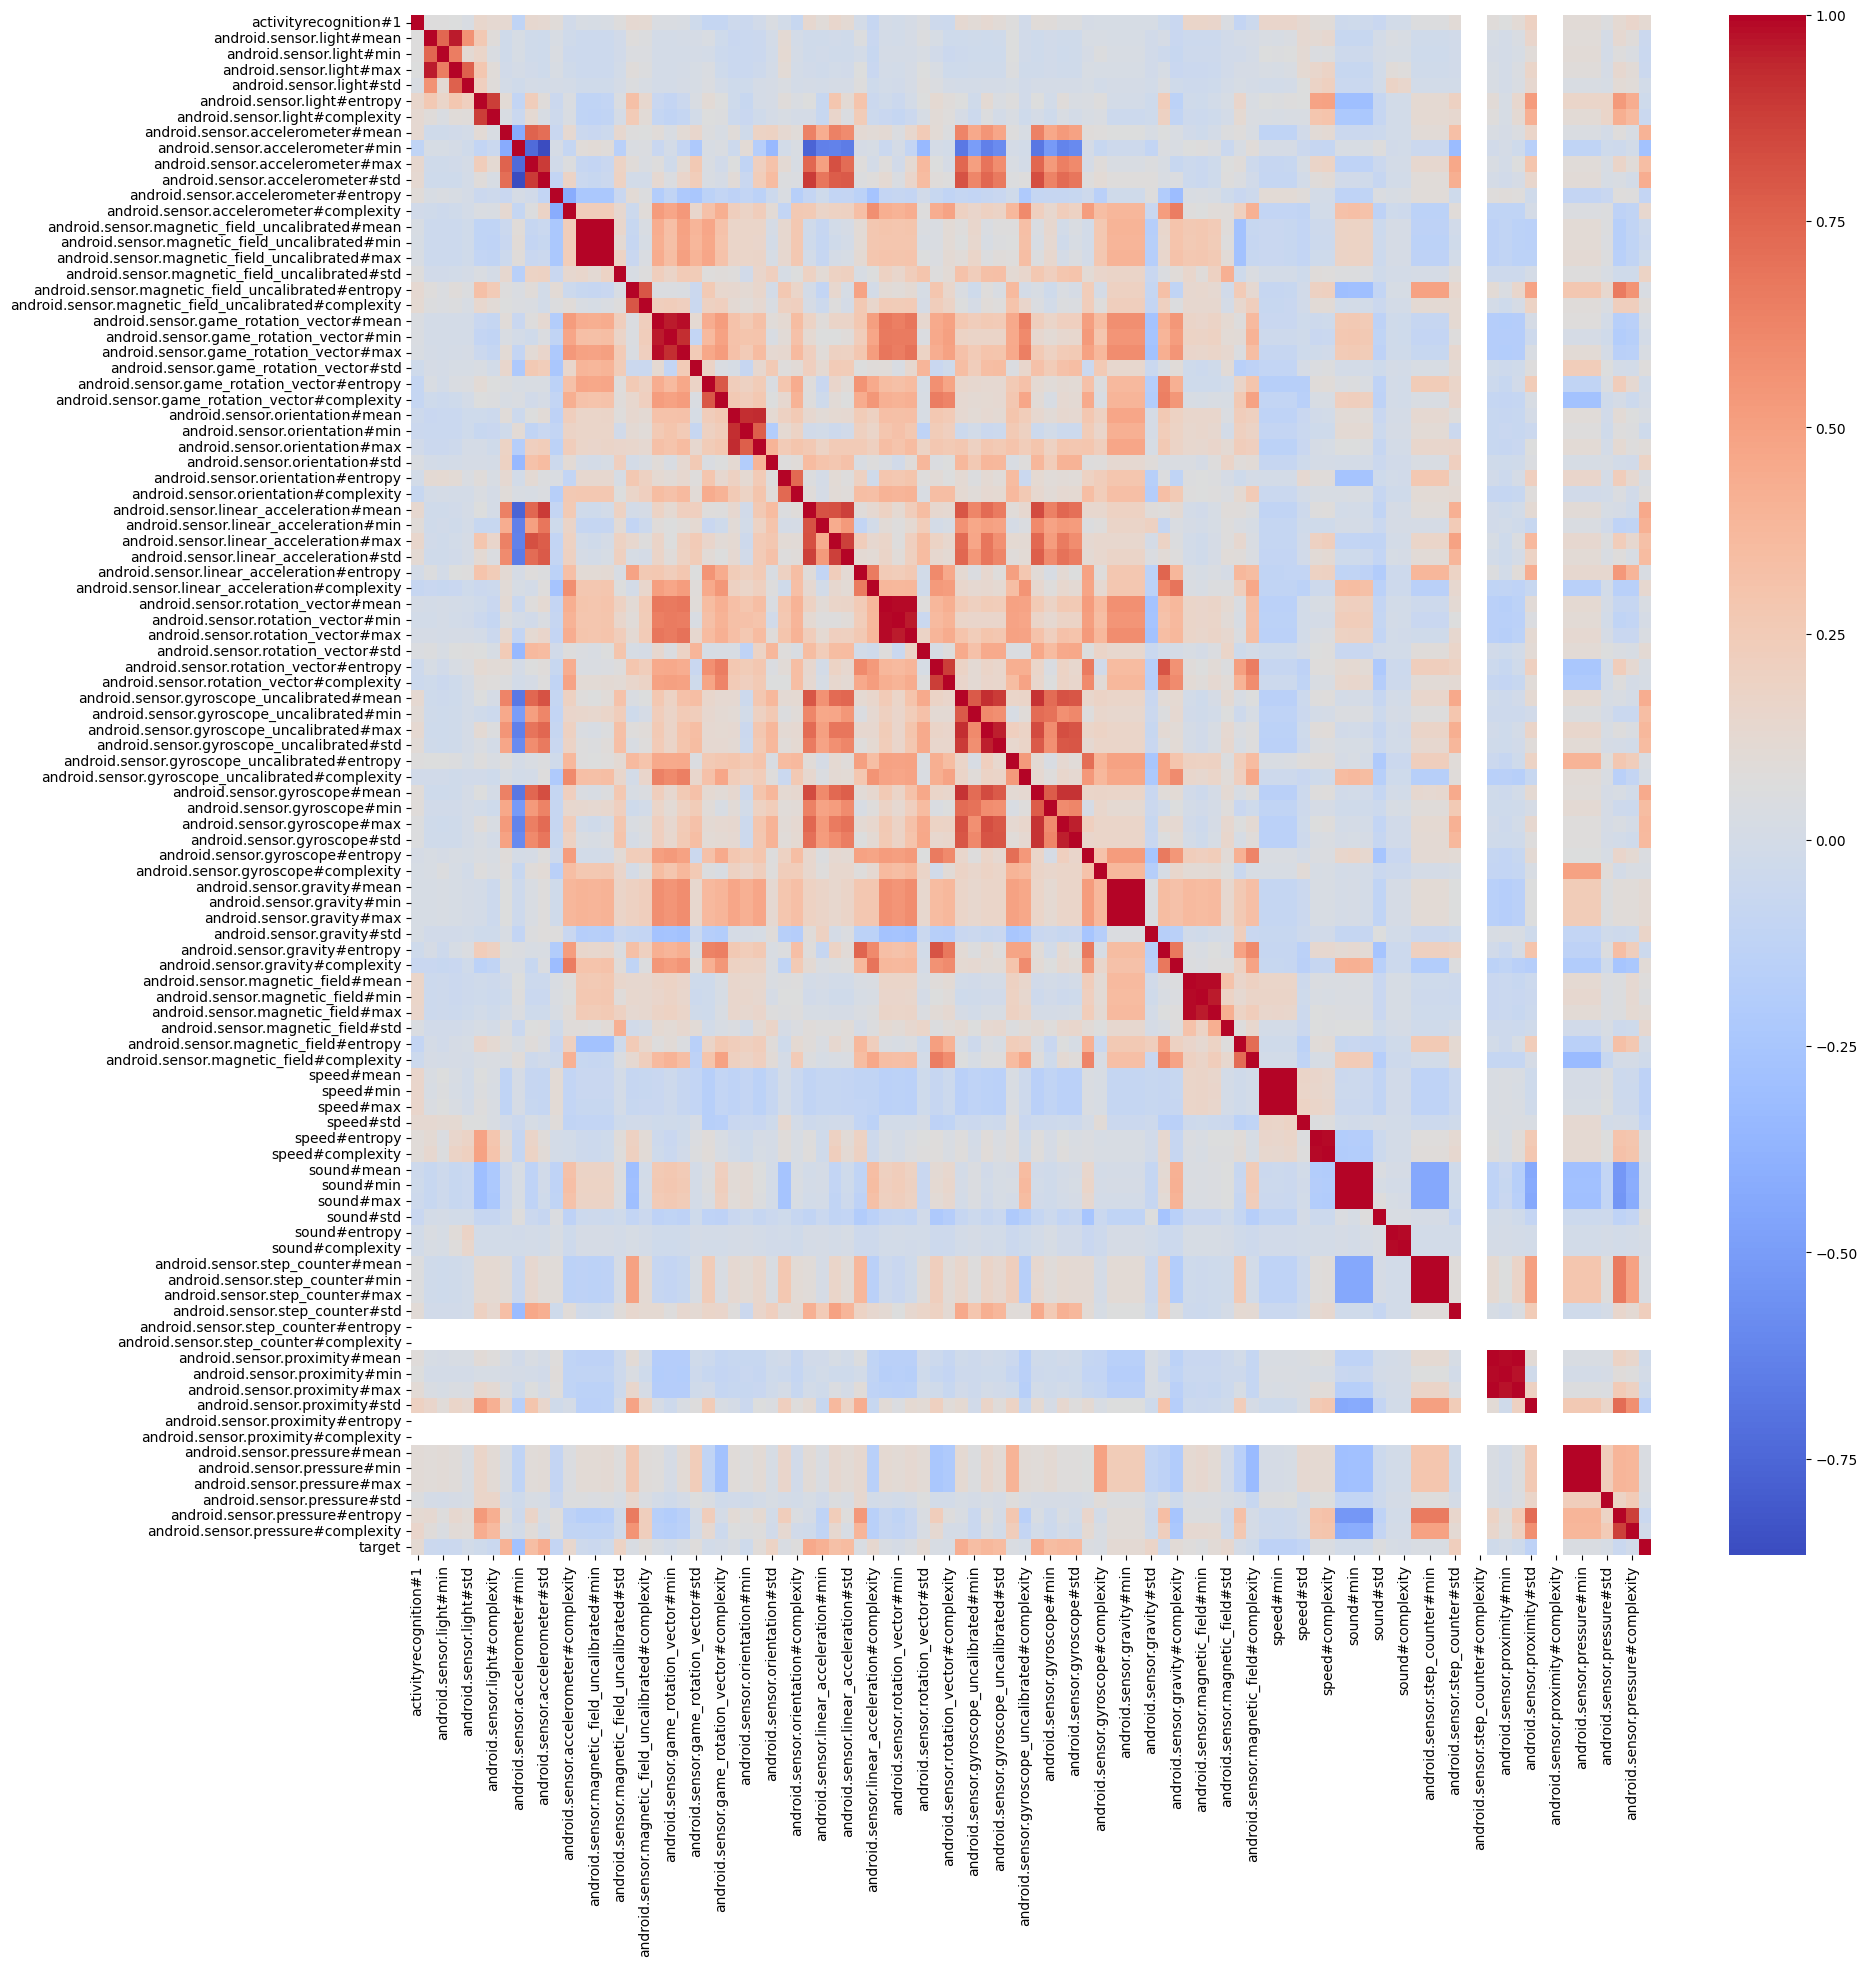

In [241]:
corr = df.corr()

plt.figure(figsize=(20,20))  
sns.heatmap(corr, annot = False, cmap = 'coolwarm')

In [242]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [243]:
corr_features = correlation(df, 0.7)
len(set(corr_features))

51

In [244]:
corr_features

{'android.sensor.accelerometer#max',
 'android.sensor.accelerometer#std',
 'android.sensor.game_rotation_vector#complexity',
 'android.sensor.game_rotation_vector#max',
 'android.sensor.game_rotation_vector#min',
 'android.sensor.gravity#entropy',
 'android.sensor.gravity#max',
 'android.sensor.gravity#min',
 'android.sensor.gyroscope#entropy',
 'android.sensor.gyroscope#max',
 'android.sensor.gyroscope#mean',
 'android.sensor.gyroscope#min',
 'android.sensor.gyroscope#std',
 'android.sensor.gyroscope_uncalibrated#max',
 'android.sensor.gyroscope_uncalibrated#mean',
 'android.sensor.gyroscope_uncalibrated#min',
 'android.sensor.gyroscope_uncalibrated#std',
 'android.sensor.light#complexity',
 'android.sensor.light#max',
 'android.sensor.light#min',
 'android.sensor.light#std',
 'android.sensor.linear_acceleration#max',
 'android.sensor.linear_acceleration#mean',
 'android.sensor.linear_acceleration#min',
 'android.sensor.linear_acceleration#std',
 'android.sensor.magnetic_field#complex

In [245]:
df1 = df.drop(corr_features,axis=1)

In [246]:
df1

,activityrecognition#1,android.sensor.light#mean,android.sensor.light#entropy,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#entropy,android.sensor.accelerometer#complexity,android.sensor.magnetic_field_uncalibrated#mean,android.sensor.magnetic_field_uncalibrated#std,android.sensor.magnetic_field_uncalibrated#entropy,...,android.sensor.step_counter#std,android.sensor.step_counter#entropy,android.sensor.step_counter#complexity,android.sensor.proximity#mean,android.sensor.proximity#std,android.sensor.proximity#entropy,android.sensor.proximity#complexity,android.sensor.pressure#mean,android.sensor.pressure#std,target
0,0.0,7.0,0.0,9.673811,9.461881,0.811699,0.094671,134.388497,2.402502,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,7.0,0.0,9.641004,5.644632,0.883534,0.059958,136.554708,4.736036,0.436209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,7.0,0.0,9.683349,9.587583,0.798529,0.097407,146.481960,0.777425,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,7.0,0.0,9.683914,9.576666,0.818604,0.089819,145.652413,0.493911,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,7.0,0.0,9.651339,8.123766,0.748452,0.111209,148.306727,0.493911,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,0.0,58.0,0.0,11.216822,7.165702,0.910240,0.045650,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3246,0.0,58.0,0.0,10.946838,6.987842,0.905799,0.047963,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3247,0.0,58.0,0.0,11.258049,5.868934,0.894406,0.054631,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3248,0.0,58.0,0.0,11.443158,6.119601,0.915331,0.045101,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


<Axes: >

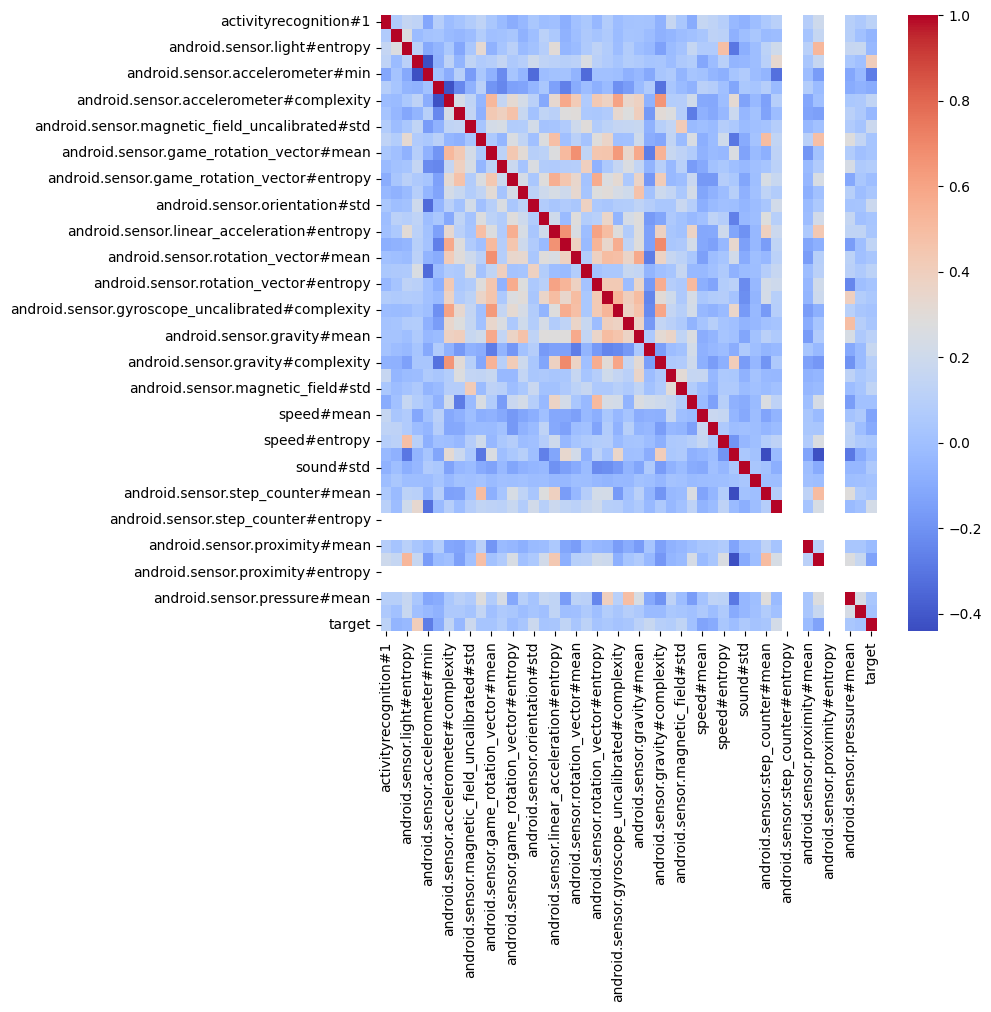

In [247]:
corr = df1.corr()

plt.figure(figsize=(8,8))  
sns.heatmap(corr, annot = False, cmap = 'coolwarm')

In [248]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250 entries, 0 to 3249
Data columns (total 47 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   activityrecognition#1                               3250 non-null   float64
 1   android.sensor.light#mean                           3250 non-null   float64
 2   android.sensor.light#entropy                        3250 non-null   float64
 3   android.sensor.accelerometer#mean                   3250 non-null   float64
 4   android.sensor.accelerometer#min                    3250 non-null   float64
 5   android.sensor.accelerometer#entropy                3250 non-null   float64
 6   android.sensor.accelerometer#complexity             3250 non-null   float64
 7   android.sensor.magnetic_field_uncalibrated#mean     3250 non-null   float64
 8   android.sensor.magnetic_field_uncalibrated#std      3250 non-null   float64
 9

In [249]:

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

enc_df = pd.DataFrame(enc.fit_transform(df1[['target']]).toarray())

final_df = df1.join(enc_df)


In [250]:
final_df = final_df.drop(['target'], axis = 1)

In [251]:
final_df

,activityrecognition#1,android.sensor.light#mean,android.sensor.light#entropy,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#entropy,android.sensor.accelerometer#complexity,android.sensor.magnetic_field_uncalibrated#mean,android.sensor.magnetic_field_uncalibrated#std,android.sensor.magnetic_field_uncalibrated#entropy,...,android.sensor.proximity#std,android.sensor.proximity#entropy,android.sensor.proximity#complexity,android.sensor.pressure#mean,android.sensor.pressure#std,0,1,2,3,4
0,0.0,7.0,0.0,9.673811,9.461881,0.811699,0.094671,134.388497,2.402502,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,7.0,0.0,9.641004,5.644632,0.883534,0.059958,136.554708,4.736036,0.436209,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,7.0,0.0,9.683349,9.587583,0.798529,0.097407,146.481960,0.777425,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,7.0,0.0,9.683914,9.576666,0.818604,0.089819,145.652413,0.493911,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,7.0,0.0,9.651339,8.123766,0.748452,0.111209,148.306727,0.493911,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,0.0,58.0,0.0,11.216822,7.165702,0.910240,0.045650,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3246,0.0,58.0,0.0,10.946838,6.987842,0.905799,0.047963,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3247,0.0,58.0,0.0,11.258049,5.868934,0.894406,0.054631,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3248,0.0,58.0,0.0,11.443158,6.119601,0.915331,0.045101,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [258]:
X = final_df.iloc[:,0:46] 
y = final_df.iloc[:,46:51]

In [259]:
X

,activityrecognition#1,android.sensor.light#mean,android.sensor.light#entropy,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#entropy,android.sensor.accelerometer#complexity,android.sensor.magnetic_field_uncalibrated#mean,android.sensor.magnetic_field_uncalibrated#std,android.sensor.magnetic_field_uncalibrated#entropy,...,android.sensor.step_counter#mean,android.sensor.step_counter#std,android.sensor.step_counter#entropy,android.sensor.step_counter#complexity,android.sensor.proximity#mean,android.sensor.proximity#std,android.sensor.proximity#entropy,android.sensor.proximity#complexity,android.sensor.pressure#mean,android.sensor.pressure#std
0,0.0,7.0,0.0,9.673811,9.461881,0.811699,0.094671,134.388497,2.402502,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,7.0,0.0,9.641004,5.644632,0.883534,0.059958,136.554708,4.736036,0.436209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,7.0,0.0,9.683349,9.587583,0.798529,0.097407,146.481960,0.777425,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,7.0,0.0,9.683914,9.576666,0.818604,0.089819,145.652413,0.493911,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,7.0,0.0,9.651339,8.123766,0.748452,0.111209,148.306727,0.493911,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,0.0,58.0,0.0,11.216822,7.165702,0.910240,0.045650,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3246,0.0,58.0,0.0,10.946838,6.987842,0.905799,0.047963,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3247,0.0,58.0,0.0,11.258049,5.868934,0.894406,0.054631,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3248,0.0,58.0,0.0,11.443158,6.119601,0.915331,0.045101,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [260]:
y

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
3245,0.0,0.0,0.0,0.0,1.0
3246,0.0,0.0,0.0,0.0,1.0
3247,0.0,0.0,0.0,0.0,1.0
3248,0.0,0.0,0.0,0.0,1.0


In [261]:

from sklearn.preprocessing import MinMaxScaler   #min max scaling

scaler = MinMaxScaler(feature_range=(0,1))

scaler.fit(X)

X_scaled = scaler.transform(X)


In [262]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (2080, 46) (2080, 5)
Validation Set -> (520, 46) (520, 5)
Test Set -> (650, 46) (650, 5)


In [263]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [264]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from keras.metrics import Precision, Recall
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

In [265]:

model = Sequential()
model.add(Dense(256, input_shape=(46,)))
model.add(Activation("relu"))
model.add(Dropout(0.40))
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.40))
model.add(Dense(5))
model.add(Activation("softmax"))


In [212]:
print(model.summary())

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_183 (Dense)           (None, 256)               11776     
                                                                 
 activation_183 (Activation  (None, 256)               0         
 )                                                               
                                                                 
 dropout_122 (Dropout)       (None, 256)               0         
                                                                 
 dense_184 (Dense)           (None, 256)               65792     
                                                                 
 activation_184 (Activation  (None, 256)               0         
 )                                                               
                                                                 
 dropout_123 (Dropout)       (None, 256)             

In [267]:
model.compile(loss='categorical_crossentropy', optimizer='adam' , metrics=['accuracy', Precision(), Recall()])

In [268]:
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=128, epochs=60, verbose=1)

Epoch 1/60
17/17 [==============================] - 2s 37ms/step - loss: 1.5482 - accuracy: 0.3159 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - val_loss: 1.4224 - val_accuracy: 0.5019 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 2/60
17/17 [==============================] - 0s 22ms/step - loss: 1.3525 - accuracy: 0.4957 - precision_5: 0.8889 - recall_5: 0.0346 - val_loss: 1.1738 - val_accuracy: 0.6404 - val_precision_5: 0.8857 - val_recall_5: 0.1192
Epoch 3/60
17/17 [==============================] - 0s 10ms/step - loss: 1.1600 - accuracy: 0.5707 - precision_5: 0.8190 - recall_5: 0.2197 - val_loss: 0.9757 - val_accuracy: 0.6962 - val_precision_5: 0.8645 - val_recall_5: 0.3558
Epoch 4/60
17/17 [==============================] - 0s 8ms/step - loss: 0.9926 - accuracy: 0.6389 - precision_5: 0.8249 - recall_5: 0.3942 - val_loss: 0.8320 - val_accuracy: 0.7423 - val_precision_5: 0.8498 - val_recall_5: 0.4788
Epoch 5/60
17/17 [==============================] - 0s 8ms/st

In [269]:
from sklearn.metrics import classification_report

In [270]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Loss  : {:.4f}'.format(loss))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.9154
Loss  : 0.2845
Precision : 0.9245
Recall    : 0.9046
F1 Score  : 0.9145


In [154]:
from sklearn.metrics import f1_score as sklearn_f1_score
import keras.backend as K
from keras.callbacks import EarlyStopping
from tqdm import tqdm
import numpy as np

batch_sizes = [8, 16, 32, 64, 128, 256]
epochs_list = [60, 100, 200]

best_accuracy = 0
best_combination = None
best_metrics = None
results = []

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    f1_val = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1_val

total_combinations = len(batch_sizes) * len(epochs_list)
with tqdm(total=total_combinations) as pbar:
    for batch_size in batch_sizes:
        for epochs in epochs_list:
            print(f"\nTreinando com batch_size={batch_size}, epochs={epochs}")
            
            model = Sequential()
            model.add(Dense(256, input_shape=(46,)))
            model.add(Activation("relu"))
            model.add(Dropout(0.40))
            model.add(Dense(256))
            model.add(Activation("relu"))
            model.add(Dropout(0.40))
            model.add(Dense(5))
            model.add(Activation("softmax"))

            model.compile(loss='categorical_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy', 'Precision', 'Recall'])
            
            early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
            
            history = model.fit(X_train, y_train,
                                validation_data=(X_val, y_val),
                                batch_size=batch_size, 
                                epochs=epochs, 
                                verbose=1,
                                callbacks=[early_stopping])
            
            loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
            f1 = f1_score(precision, recall)
            
            current_result = {
                'batch_size': batch_size,
                'epochs': epochs,
                'accuracy': accuracy,
                'loss': loss,
                'precision': precision,
                'recall': recall,
                'f1_score': f1
            }
            results.append(current_result)
            
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_combination = (batch_size, epochs)
                best_metrics = current_result
            
            pbar.update(1)

print("\n===== Melhor Combinação =====")
print(f"Batch Size: {best_combination[0]}")
print(f"Epochs: {best_combination[1]}")
print('')
print('Accuracy  : {:.4f}'.format(best_metrics['accuracy']))
print('Loss      : {:.4f}'.format(best_metrics['loss']))
print('Precision : {:.4f}'.format(best_metrics['precision']))
print('Recall    : {:.4f}'.format(best_metrics['recall']))
print('F1 Score  : {:.4f}'.format(best_metrics['f1_score']))

  0%|          | 0/18 [00:00<?, ?it/s]


Treinando com batch_size=8, epochs=60
Epoch 1/60
260/260 [==============================] - 2s 3ms/step - loss: 1.2790 - accuracy: 0.4654 - precision: 0.7929 - recall: 0.1712 - val_loss: 0.8979 - val_accuracy: 0.7173 - val_precision: 0.8556 - val_recall: 0.4442
Epoch 2/60
260/260 [==============================] - 1s 3ms/step - loss: 0.8523 - accuracy: 0.6933 - precision: 0.7977 - recall: 0.5327 - val_loss: 0.7383 - val_accuracy: 0.7519 - val_precision: 0.7986 - val_recall: 0.6404
Epoch 3/60
260/260 [==============================] - 1s 2ms/step - loss: 0.6720 - accuracy: 0.7591 - precision: 0.8247 - recall: 0.6514 - val_loss: 0.5338 - val_accuracy: 0.8212 - val_precision: 0.8730 - val_recall: 0.7404
Epoch 4/60
260/260 [==============================] - 1s 2ms/step - loss: 0.5934 - accuracy: 0.7885 - precision: 0.8528 - recall: 0.7212 - val_loss: 0.4916 - val_accuracy: 0.8288 - val_precision: 0.8732 - val_recall: 0.7942
Epoch 5/60
260/260 [==============================] - 1s 3ms/step

  6%|▌         | 1/18 [00:56<15:55, 56.22s/it]


Treinando com batch_size=8, epochs=100
Epoch 1/100
260/260 [==============================] - 2s 4ms/step - loss: 1.3002 - accuracy: 0.4745 - precision: 0.7538 - recall: 0.1663 - val_loss: 0.9125 - val_accuracy: 0.6577 - val_precision: 0.8484 - val_recall: 0.4519
Epoch 2/100
260/260 [==============================] - 1s 4ms/step - loss: 0.8576 - accuracy: 0.6938 - precision: 0.8125 - recall: 0.5332 - val_loss: 0.6688 - val_accuracy: 0.7596 - val_precision: 0.8662 - val_recall: 0.6596
Epoch 3/100
260/260 [==============================] - 1s 5ms/step - loss: 0.6989 - accuracy: 0.7606 - precision: 0.8331 - recall: 0.6505 - val_loss: 0.5534 - val_accuracy: 0.8135 - val_precision: 0.8681 - val_recall: 0.7596
Epoch 4/100
260/260 [==============================] - 1s 4ms/step - loss: 0.5988 - accuracy: 0.7918 - precision: 0.8435 - recall: 0.7231 - val_loss: 0.5600 - val_accuracy: 0.8000 - val_precision: 0.8418 - val_recall: 0.7673
Epoch 5/100
260/260 [==============================] - 1s 4m

 11%|█         | 2/18 [02:11<17:58, 67.40s/it]


Treinando com batch_size=8, epochs=200
Epoch 1/200
260/260 [==============================] - 2s 5ms/step - loss: 1.2713 - accuracy: 0.4750 - precision: 0.7635 - recall: 0.1832 - val_loss: 0.9280 - val_accuracy: 0.6519 - val_precision: 0.8221 - val_recall: 0.4712
Epoch 2/200
260/260 [==============================] - 1s 3ms/step - loss: 0.8339 - accuracy: 0.7043 - precision: 0.8104 - recall: 0.5466 - val_loss: 0.6695 - val_accuracy: 0.7615 - val_precision: 0.8447 - val_recall: 0.6692
Epoch 3/200
260/260 [==============================] - 1s 3ms/step - loss: 0.6678 - accuracy: 0.7563 - precision: 0.8250 - recall: 0.6596 - val_loss: 0.5717 - val_accuracy: 0.8077 - val_precision: 0.8598 - val_recall: 0.7077
Epoch 4/200
260/260 [==============================] - 1s 4ms/step - loss: 0.5640 - accuracy: 0.8058 - precision: 0.8499 - recall: 0.7351 - val_loss: 0.4736 - val_accuracy: 0.8327 - val_precision: 0.8790 - val_recall: 0.7962
Epoch 5/200
260/260 [==============================] - 1s 3m

 17%|█▋        | 3/18 [03:13<16:12, 64.80s/it]


Treinando com batch_size=16, epochs=60
Epoch 1/60
130/130 [==============================] - 2s 7ms/step - loss: 1.3758 - accuracy: 0.4250 - precision: 0.7805 - recall: 0.0923 - val_loss: 1.0115 - val_accuracy: 0.6288 - val_precision: 0.8122 - val_recall: 0.3577
Epoch 2/60
130/130 [==============================] - 0s 4ms/step - loss: 0.9367 - accuracy: 0.6543 - precision: 0.7926 - recall: 0.4630 - val_loss: 0.7246 - val_accuracy: 0.7500 - val_precision: 0.8485 - val_recall: 0.5923
Epoch 3/60
130/130 [==============================] - 0s 4ms/step - loss: 0.7394 - accuracy: 0.7471 - precision: 0.8196 - recall: 0.6269 - val_loss: 0.6113 - val_accuracy: 0.7904 - val_precision: 0.8598 - val_recall: 0.7077
Epoch 4/60
130/130 [==============================] - 0s 4ms/step - loss: 0.6171 - accuracy: 0.7851 - precision: 0.8481 - recall: 0.6981 - val_loss: 0.5609 - val_accuracy: 0.8000 - val_precision: 0.8395 - val_recall: 0.7442
Epoch 5/60
130/130 [==============================] - 1s 4ms/ste

 22%|██▏       | 4/18 [03:36<11:19, 48.55s/it]


Treinando com batch_size=16, epochs=100
Epoch 1/100
130/130 [==============================] - 2s 8ms/step - loss: 1.3955 - accuracy: 0.4207 - precision: 0.7727 - recall: 0.0817 - val_loss: 1.0479 - val_accuracy: 0.6481 - val_precision: 0.8603 - val_recall: 0.2962
Epoch 2/100
130/130 [==============================] - 1s 4ms/step - loss: 0.9723 - accuracy: 0.6389 - precision: 0.8061 - recall: 0.4197 - val_loss: 0.7447 - val_accuracy: 0.7615 - val_precision: 0.8652 - val_recall: 0.5923
Epoch 3/100
130/130 [==============================] - 0s 4ms/step - loss: 0.7584 - accuracy: 0.7293 - precision: 0.8280 - recall: 0.5923 - val_loss: 0.6118 - val_accuracy: 0.7962 - val_precision: 0.8438 - val_recall: 0.6962
Epoch 4/100
130/130 [==============================] - 0s 4ms/step - loss: 0.6294 - accuracy: 0.7774 - precision: 0.8536 - recall: 0.6981 - val_loss: 0.5643 - val_accuracy: 0.7923 - val_precision: 0.8373 - val_recall: 0.7423
Epoch 5/100
130/130 [==============================] - 1s 4

 28%|██▊       | 5/18 [04:18<09:58, 46.06s/it]


Treinando com batch_size=16, epochs=200
Epoch 1/200
130/130 [==============================] - 2s 7ms/step - loss: 1.3740 - accuracy: 0.4442 - precision: 0.7832 - recall: 0.0851 - val_loss: 1.0380 - val_accuracy: 0.6231 - val_precision: 0.8319 - val_recall: 0.3808
Epoch 2/200
130/130 [==============================] - 0s 4ms/step - loss: 0.9587 - accuracy: 0.6375 - precision: 0.7929 - recall: 0.4490 - val_loss: 0.7424 - val_accuracy: 0.7558 - val_precision: 0.8829 - val_recall: 0.5942
Epoch 3/200
130/130 [==============================] - 0s 4ms/step - loss: 0.7483 - accuracy: 0.7510 - precision: 0.8397 - recall: 0.5995 - val_loss: 0.6251 - val_accuracy: 0.7885 - val_precision: 0.8545 - val_recall: 0.7000
Epoch 4/200
130/130 [==============================] - 0s 4ms/step - loss: 0.6548 - accuracy: 0.7740 - precision: 0.8461 - recall: 0.6793 - val_loss: 0.5514 - val_accuracy: 0.8038 - val_precision: 0.8465 - val_recall: 0.7635
Epoch 5/200
130/130 [==============================] - 1s 4

 33%|███▎      | 6/18 [04:43<07:47, 38.96s/it]


Treinando com batch_size=32, epochs=60
Epoch 1/60
65/65 [==============================] - 2s 11ms/step - loss: 1.4422 - accuracy: 0.3861 - precision: 0.7885 - recall: 0.0394 - val_loss: 1.1623 - val_accuracy: 0.5942 - val_precision: 0.8143 - val_recall: 0.1096
Epoch 2/60
65/65 [==============================] - 0s 4ms/step - loss: 1.0607 - accuracy: 0.6034 - precision: 0.7847 - recall: 0.3399 - val_loss: 0.8392 - val_accuracy: 0.7038 - val_precision: 0.8660 - val_recall: 0.4846
Epoch 3/60
65/65 [==============================] - 0s 4ms/step - loss: 0.8366 - accuracy: 0.7101 - precision: 0.8189 - recall: 0.5370 - val_loss: 0.7160 - val_accuracy: 0.7635 - val_precision: 0.8371 - val_recall: 0.6423
Epoch 4/60
65/65 [==============================] - 0s 6ms/step - loss: 0.7286 - accuracy: 0.7457 - precision: 0.8195 - recall: 0.6178 - val_loss: 0.6453 - val_accuracy: 0.7788 - val_precision: 0.8341 - val_recall: 0.6769
Epoch 5/60
65/65 [==============================] - 0s 4ms/step - loss:

 39%|███▉      | 7/18 [05:02<05:57, 32.54s/it]


Treinando com batch_size=32, epochs=100
Epoch 1/100
65/65 [==============================] - 2s 11ms/step - loss: 1.4584 - accuracy: 0.3933 - precision: 0.8571 - recall: 0.0288 - val_loss: 1.2037 - val_accuracy: 0.5923 - val_precision: 0.8667 - val_recall: 0.1500
Epoch 2/100
65/65 [==============================] - 0s 4ms/step - loss: 1.1109 - accuracy: 0.5798 - precision: 0.7854 - recall: 0.2957 - val_loss: 0.8735 - val_accuracy: 0.7173 - val_precision: 0.8694 - val_recall: 0.4865
Epoch 3/100
65/65 [==============================] - 0s 4ms/step - loss: 0.8721 - accuracy: 0.6769 - precision: 0.8147 - recall: 0.5010 - val_loss: 0.7351 - val_accuracy: 0.7577 - val_precision: 0.8636 - val_recall: 0.6212
Epoch 4/100
65/65 [==============================] - 0s 4ms/step - loss: 0.7383 - accuracy: 0.7490 - precision: 0.8453 - recall: 0.6096 - val_loss: 0.6307 - val_accuracy: 0.7962 - val_precision: 0.8716 - val_recall: 0.7308
Epoch 5/100
65/65 [==============================] - 0s 4ms/step -

 44%|████▍     | 8/18 [05:28<05:02, 30.20s/it]


Treinando com batch_size=32, epochs=200
Epoch 1/200
65/65 [==============================] - 2s 11ms/step - loss: 1.4586 - accuracy: 0.3769 - precision: 0.7231 - recall: 0.0226 - val_loss: 1.2199 - val_accuracy: 0.5808 - val_precision: 0.8298 - val_recall: 0.1500
Epoch 2/200
65/65 [==============================] - 0s 4ms/step - loss: 1.0670 - accuracy: 0.5971 - precision: 0.8010 - recall: 0.3192 - val_loss: 0.8561 - val_accuracy: 0.7154 - val_precision: 0.8730 - val_recall: 0.5154
Epoch 3/200
65/65 [==============================] - 0s 4ms/step - loss: 0.8628 - accuracy: 0.6976 - precision: 0.8173 - recall: 0.5269 - val_loss: 0.7096 - val_accuracy: 0.7731 - val_precision: 0.8609 - val_recall: 0.6308
Epoch 4/200
65/65 [==============================] - 0s 4ms/step - loss: 0.7167 - accuracy: 0.7538 - precision: 0.8379 - recall: 0.6212 - val_loss: 0.6058 - val_accuracy: 0.8192 - val_precision: 0.8656 - val_recall: 0.7058
Epoch 5/200
65/65 [==============================] - 0s 4ms/step -

 50%|█████     | 9/18 [05:53<04:17, 28.57s/it]


Treinando com batch_size=64, epochs=60
Epoch 1/60
33/33 [==============================] - 2s 17ms/step - loss: 1.5225 - accuracy: 0.3370 - precision: 0.7143 - recall: 0.0024 - val_loss: 1.3545 - val_accuracy: 0.5865 - val_precision: 1.0000 - val_recall: 0.0096
Epoch 2/60
33/33 [==============================] - 0s 6ms/step - loss: 1.2625 - accuracy: 0.5173 - precision: 0.8108 - recall: 0.1298 - val_loss: 1.0717 - val_accuracy: 0.6212 - val_precision: 0.9024 - val_recall: 0.2846
Epoch 3/60
33/33 [==============================] - 0s 6ms/step - loss: 1.0321 - accuracy: 0.6216 - precision: 0.7977 - recall: 0.3736 - val_loss: 0.8466 - val_accuracy: 0.7250 - val_precision: 0.8793 - val_recall: 0.4904
Epoch 4/60
33/33 [==============================] - 0s 6ms/step - loss: 0.8823 - accuracy: 0.6894 - precision: 0.8143 - recall: 0.4808 - val_loss: 0.7350 - val_accuracy: 0.7673 - val_precision: 0.8911 - val_recall: 0.6135
Epoch 5/60
33/33 [==============================] - 0s 7ms/step - loss:

 56%|█████▌    | 10/18 [06:05<03:09, 23.67s/it]


Treinando com batch_size=64, epochs=100
Epoch 1/100
33/33 [==============================] - 2s 14ms/step - loss: 1.5215 - accuracy: 0.3322 - precision: 0.8333 - recall: 0.0048 - val_loss: 1.3355 - val_accuracy: 0.5519 - val_precision: 1.0000 - val_recall: 0.0231
Epoch 2/100
33/33 [==============================] - 0s 5ms/step - loss: 1.2458 - accuracy: 0.5192 - precision: 0.8098 - recall: 0.1433 - val_loss: 0.9759 - val_accuracy: 0.6827 - val_precision: 0.8937 - val_recall: 0.3558
Epoch 3/100
33/33 [==============================] - 0s 5ms/step - loss: 0.9873 - accuracy: 0.6423 - precision: 0.8095 - recall: 0.4087 - val_loss: 0.8153 - val_accuracy: 0.7192 - val_precision: 0.8634 - val_recall: 0.5346
Epoch 4/100
33/33 [==============================] - 0s 5ms/step - loss: 0.8394 - accuracy: 0.6962 - precision: 0.8227 - recall: 0.5264 - val_loss: 0.6919 - val_accuracy: 0.7865 - val_precision: 0.8750 - val_recall: 0.6462
Epoch 5/100
33/33 [==============================] - 0s 5ms/step -

 61%|██████    | 11/18 [06:24<02:34, 22.04s/it]


Treinando com batch_size=64, epochs=200
Epoch 1/200
33/33 [==============================] - 2s 17ms/step - loss: 1.5224 - accuracy: 0.3322 - precision: 0.8333 - recall: 0.0024 - val_loss: 1.3138 - val_accuracy: 0.6038 - val_precision: 0.8750 - val_recall: 0.0135
Epoch 2/200
33/33 [==============================] - 0s 5ms/step - loss: 1.2423 - accuracy: 0.5221 - precision: 0.7788 - recall: 0.1625 - val_loss: 1.0188 - val_accuracy: 0.6346 - val_precision: 0.8883 - val_recall: 0.3058
Epoch 3/200
33/33 [==============================] - 0s 5ms/step - loss: 0.9986 - accuracy: 0.6346 - precision: 0.7985 - recall: 0.3981 - val_loss: 0.8431 - val_accuracy: 0.6981 - val_precision: 0.8365 - val_recall: 0.5115
Epoch 4/200
33/33 [==============================] - 0s 5ms/step - loss: 0.8606 - accuracy: 0.6976 - precision: 0.8105 - recall: 0.5120 - val_loss: 0.7219 - val_accuracy: 0.7538 - val_precision: 0.8485 - val_recall: 0.5923
Epoch 5/200
33/33 [==============================] - 0s 5ms/step -

 67%|██████▋   | 12/18 [06:44<02:09, 21.54s/it]


Treinando com batch_size=128, epochs=60
Epoch 1/60
17/17 [==============================] - 1s 25ms/step - loss: 1.5551 - accuracy: 0.3236 - precision: 1.0000 - recall: 4.8077e-04 - val_loss: 1.3978 - val_accuracy: 0.5173 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
17/17 [==============================] - 0s 7ms/step - loss: 1.3592 - accuracy: 0.4755 - precision: 0.8020 - recall: 0.0389 - val_loss: 1.1891 - val_accuracy: 0.6288 - val_precision: 0.9091 - val_recall: 0.1346
Epoch 3/60
17/17 [==============================] - 0s 7ms/step - loss: 1.1673 - accuracy: 0.5678 - precision: 0.8241 - recall: 0.2139 - val_loss: 1.0023 - val_accuracy: 0.6577 - val_precision: 0.8726 - val_recall: 0.3558
Epoch 4/60
17/17 [==============================] - 0s 7ms/step - loss: 1.0051 - accuracy: 0.6361 - precision: 0.8138 - recall: 0.3846 - val_loss: 0.8562 - val_accuracy: 0.6962 - val_precision: 0.8814 - val_recall: 0.5000
Epoch 5/60
17/17 [==============================] - 0s 7ms

 72%|███████▏  | 13/18 [06:53<01:28, 17.69s/it]


Treinando com batch_size=128, epochs=100
Epoch 1/100
17/17 [==============================] - 2s 28ms/step - loss: 1.5548 - accuracy: 0.2990 - precision: 0.5000 - recall: 4.8077e-04 - val_loss: 1.4295 - val_accuracy: 0.5212 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
17/17 [==============================] - 0s 8ms/step - loss: 1.3566 - accuracy: 0.4673 - precision: 0.8426 - recall: 0.0437 - val_loss: 1.2331 - val_accuracy: 0.5981 - val_precision: 0.7797 - val_recall: 0.0885
Epoch 3/100
17/17 [==============================] - 0s 7ms/step - loss: 1.1935 - accuracy: 0.5466 - precision: 0.7899 - recall: 0.2096 - val_loss: 1.0398 - val_accuracy: 0.6673 - val_precision: 0.8529 - val_recall: 0.2788
Epoch 4/100
17/17 [==============================] - 0s 7ms/step - loss: 1.0415 - accuracy: 0.6091 - precision: 0.7996 - recall: 0.3529 - val_loss: 0.9088 - val_accuracy: 0.6981 - val_precision: 0.8561 - val_recall: 0.4346
Epoch 5/100
17/17 [==============================] - 

 78%|███████▊  | 14/18 [07:15<01:16, 19.05s/it]


Treinando com batch_size=128, epochs=200
Epoch 1/200
17/17 [==============================] - 2s 27ms/step - loss: 1.5746 - accuracy: 0.2856 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.4513 - val_accuracy: 0.5135 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/200
17/17 [==============================] - 0s 11ms/step - loss: 1.4051 - accuracy: 0.4553 - precision: 0.8421 - recall: 0.0231 - val_loss: 1.2460 - val_accuracy: 0.5962 - val_precision: 0.8750 - val_recall: 0.0404
Epoch 3/200
17/17 [==============================] - 0s 9ms/step - loss: 1.2176 - accuracy: 0.5471 - precision: 0.7823 - recall: 0.1486 - val_loss: 1.0329 - val_accuracy: 0.6577 - val_precision: 0.8791 - val_recall: 0.3077
Epoch 4/200
17/17 [==============================] - 0s 9ms/step - loss: 1.0473 - accuracy: 0.6163 - precision: 0.8153 - recall: 0.3587 - val_loss: 0.8747 - val_accuracy: 0.7038 - val_precision: 0.8556 - val_recall: 0.4673
Epoch 5/200
17/17 [=============================

 83%|████████▎ | 15/18 [07:31<00:54, 18.00s/it]


Treinando com batch_size=256, epochs=60
Epoch 1/60
9/9 [==============================] - 2s 50ms/step - loss: 1.5873 - accuracy: 0.2712 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.4829 - val_accuracy: 0.5308 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
9/9 [==============================] - 0s 11ms/step - loss: 1.4675 - accuracy: 0.3976 - precision: 1.0000 - recall: 0.0063 - val_loss: 1.3769 - val_accuracy: 0.5615 - val_precision: 1.0000 - val_recall: 0.0231
Epoch 3/60
9/9 [==============================] - 0s 13ms/step - loss: 1.3598 - accuracy: 0.4716 - precision: 0.7867 - recall: 0.0567 - val_loss: 1.2410 - val_accuracy: 0.5558 - val_precision: 0.8689 - val_recall: 0.1019
Epoch 4/60
9/9 [==============================] - 0s 12ms/step - loss: 1.2456 - accuracy: 0.5264 - precision: 0.8192 - recall: 0.1351 - val_loss: 1.1354 - val_accuracy: 0.6308 - val_precision: 0.8378 - val_recall: 0.1788
Epoch 5/60
9/9 [==============================] - 0s 14ms/s

 89%|████████▉ | 16/18 [07:40<00:31, 15.50s/it]


Treinando com batch_size=256, epochs=100
Epoch 1/100
9/9 [==============================] - 2s 57ms/step - loss: 1.6007 - accuracy: 0.2519 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.4827 - val_accuracy: 0.5288 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
9/9 [==============================] - 0s 14ms/step - loss: 1.4795 - accuracy: 0.3933 - precision: 0.9062 - recall: 0.0139 - val_loss: 1.3688 - val_accuracy: 0.5577 - val_precision: 1.0000 - val_recall: 0.0250
Epoch 3/100
9/9 [==============================] - 0s 14ms/step - loss: 1.3584 - accuracy: 0.4856 - precision: 0.8673 - recall: 0.0409 - val_loss: 1.2334 - val_accuracy: 0.5904 - val_precision: 0.9310 - val_recall: 0.0519
Epoch 4/100
9/9 [==============================] - 0s 17ms/step - loss: 1.2382 - accuracy: 0.5437 - precision: 0.8270 - recall: 0.1356 - val_loss: 1.1210 - val_accuracy: 0.6365 - val_precision: 0.8583 - val_recall: 0.1981
Epoch 5/100
9/9 [==============================] - 0s 

 94%|█████████▍| 17/18 [07:54<00:14, 14.86s/it]


Treinando com batch_size=256, epochs=200
Epoch 1/200
9/9 [==============================] - 2s 50ms/step - loss: 1.5778 - accuracy: 0.2755 - precision: 1.0000 - recall: 4.8077e-04 - val_loss: 1.4766 - val_accuracy: 0.4788 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/200
9/9 [==============================] - 0s 11ms/step - loss: 1.4641 - accuracy: 0.4183 - precision: 0.9167 - recall: 0.0053 - val_loss: 1.3560 - val_accuracy: 0.5365 - val_precision: 1.0000 - val_recall: 0.0135
Epoch 3/200
9/9 [==============================] - 0s 12ms/step - loss: 1.3537 - accuracy: 0.4837 - precision: 0.8000 - recall: 0.0385 - val_loss: 1.2245 - val_accuracy: 0.6154 - val_precision: 0.8667 - val_recall: 0.0750
Epoch 4/200
9/9 [==============================] - 0s 12ms/step - loss: 1.2301 - accuracy: 0.5442 - precision: 0.8255 - recall: 0.1433 - val_loss: 1.0923 - val_accuracy: 0.6558 - val_precision: 0.9027 - val_recall: 0.1962
Epoch 5/200
9/9 [==============================] - 0s 11ms

100%|██████████| 18/18 [08:12<00:00, 27.35s/it]


===== Melhor Combinação =====
Batch Size: 64
Epochs: 100

Accuracy  : 0.9400
Loss      : 0.2425
Precision : 0.9412
Recall    : 0.9354
F1 Score  : 0.9383


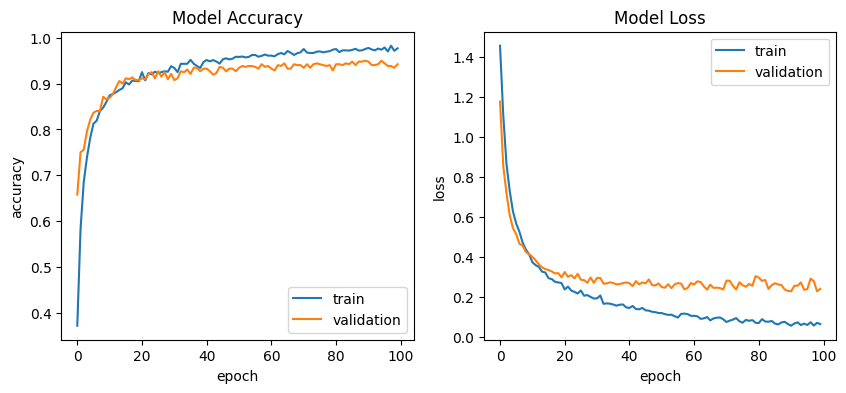

In [139]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

37/37 [==============================] - 0s 2ms/step


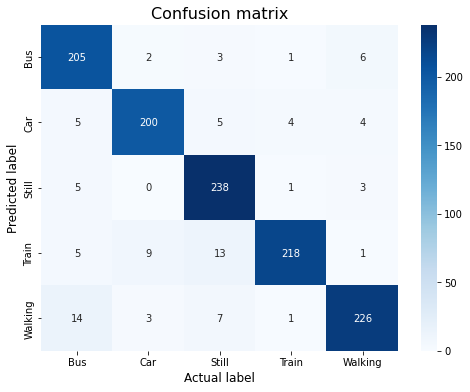

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Bus', 'Car', 'Still', 'Train', 'Walking']    #{'Bus':0,'Car':1,'Still':2,'Train':3,'Walking':4}
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)